   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Mi

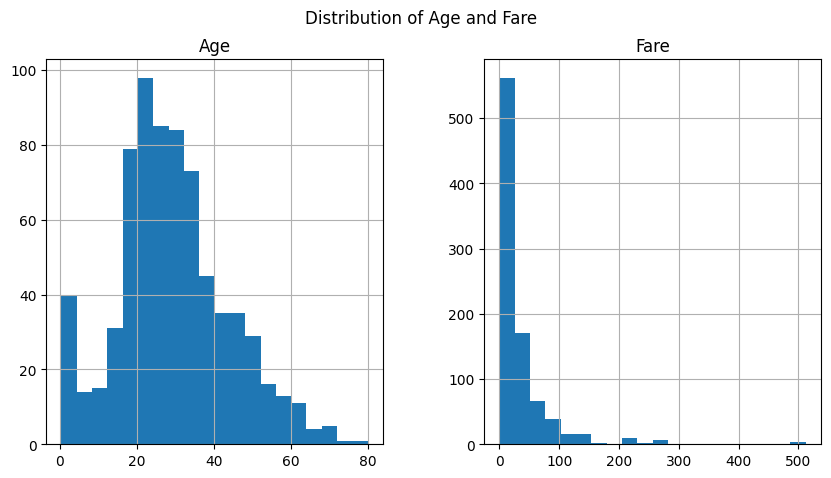

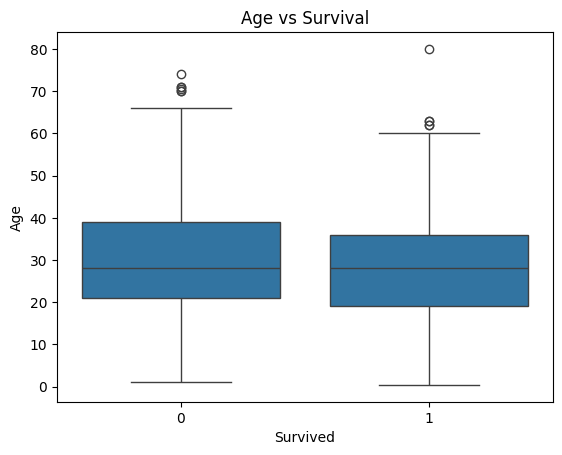

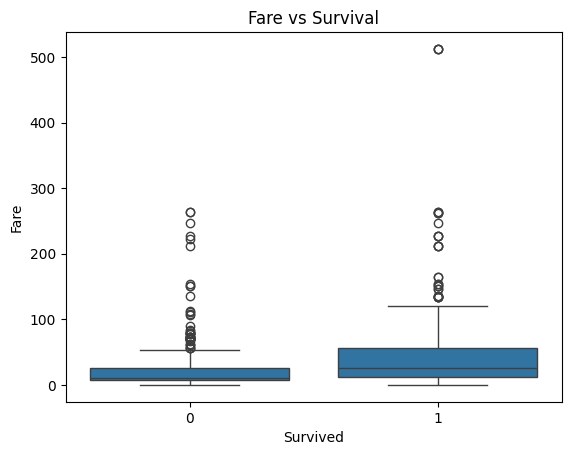

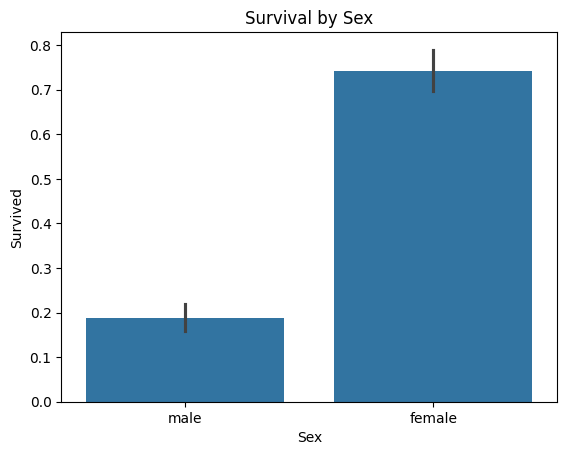

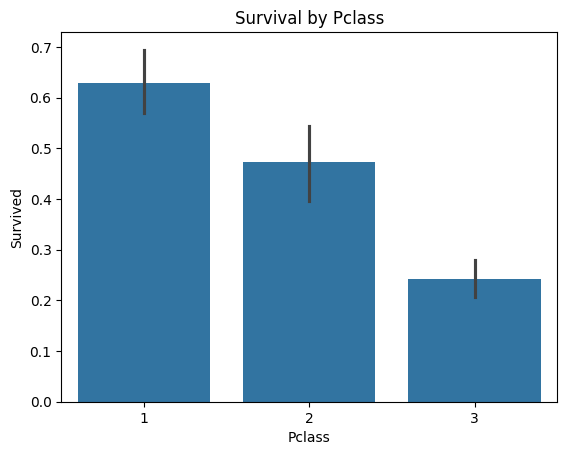

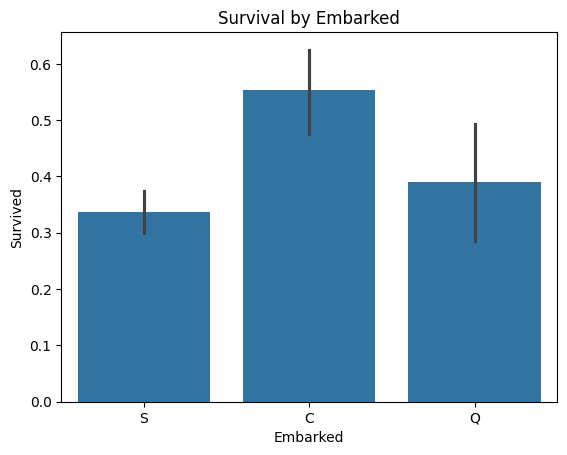

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

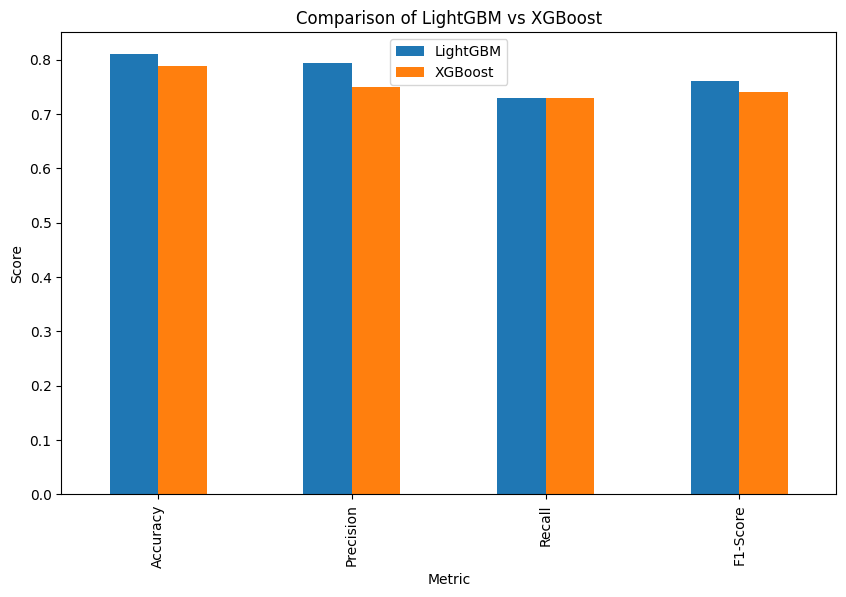

Predictions saved to 'titanic_submission.csv'


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Titanic datasets
train_df = pd.read_csv(r'C:\Users\Dell\Downloads\Titanic_train.csv')  
test_df = pd.read_csv(r'C:\Users\Dell\Downloads\Titanic_test.csv')   

# Step 1: Exploratory Data Analysis (EDA)
print(train_df.head())

# 1.1: Check for missing values in the training dataset
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
print("Missing Values in Training Dataset:\n", missing_train)

# 1.2: Check for missing values in the test dataset
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
print("Missing Values in Test Dataset:\n", missing_test)

# 1.3: Visualize distributions (for continuous variables)
train_df[['Age', 'Fare']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribution of Age and Fare')
plt.show()

# 1.4: Boxplots to check Age and Fare by Survival
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs Survival')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare vs Survival')
plt.show()

# 1.5: Bar Plots to explore categorical features
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival by Sex')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival by Pclass')
plt.show()

sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival by Embarked')
plt.show()

# Step 2: Data Preprocessing
# 2.1: Impute missing values
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)  # 'Fare' may be missing in test set

# 2.2: Encode categorical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and 'Pclass' in both train and test sets
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)

# Step 3: Feature Engineering and Model Building

# Features and target variable
X_train = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Drop non-relevant columns
y_train = train_df['Survived']

# Split data into training and testing sets (for training evaluation)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 4: Build and Evaluate Models

# LightGBM Model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train_split, y_train_split)

# XGBoost Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_split, y_train_split)

# Predictions on test split
y_pred_lgbm = lgbm_model.predict(X_test_split)
y_pred_xgb = xgb_model.predict(X_test_split)

# Evaluate models
accuracy_lgbm = accuracy_score(y_test_split, y_pred_lgbm)
precision_lgbm = precision_score(y_test_split, y_pred_lgbm)
recall_lgbm = recall_score(y_test_split, y_pred_lgbm)
f1_lgbm = f1_score(y_test_split, y_pred_lgbm)

accuracy_xgb = accuracy_score(y_test_split, y_pred_xgb)
precision_xgb = precision_score(y_test_split, y_pred_xgb)
recall_xgb = recall_score(y_test_split, y_pred_xgb)
f1_xgb = f1_score(y_test_split, y_pred_xgb)

# Print model comparison
print(f"LightGBM - Accuracy: {accuracy_lgbm}, Precision: {precision_lgbm}, Recall: {recall_lgbm}, F1-Score: {f1_lgbm}")
print(f"XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1-Score: {f1_xgb}")

# Step 5: Comparative Analysis

# Create a DataFrame to compare models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgbm_scores = [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm]
xgb_scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

# Plot comparison
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'LightGBM': lgbm_scores,
    'XGBoost': xgb_scores
})

comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), title='Comparison of LightGBM vs XGBoost')
plt.ylabel('Score')
plt.show()

# Step 6: Final Predictions on Test Set

# Use the best model (e.g., LightGBM) to predict on the Titanic Test set
y_test_pred = lgbm_model.predict(test_df.drop(columns=['Name', 'Ticket', 'Cabin']))


# Prepare the submission DataFrame
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_test_pred})

# Save the predictions to a CSV file for submission
submission.to_csv('titanic_submission.csv', index=False)

print("Predictions saved to 'titanic_submission.csv'")


In [2]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00


In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 2.4/124.9 MB 5.2 MB/s eta 0:00:24
   - -------------------------------------- 3.4/124.9 MB 4.9 MB/s eta 0:00:25
   - -------------------------------------- 4.7/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 6.3/124.9 MB 5.4 MB/s eta 0:00:22
   -- ------------------------------------- 7.1/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 8.4/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 9.7/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 10.7/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 11.8/124.9 MB 5.4 MB/s eta 0:00:21
   ---- ----------------------------------- 12.8/124.9 MB 5.4 MB/s eta 0:00: